<a href="https://colab.research.google.com/github/Manuels919/Data-Science-Projects/blob/main/Causes_of_Death_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project
>Raphael Manuel

##Abstract

All living organisms alike have evolved for thousands of years and the one thing that has remained absolute is death. Death is a part of the life cycle of every living organism. From plants, to animals, and to humans. With the following dataset we will explore the various causes of death in each country and draw conclusions. 



##Questions

###Some of the the questions that I plan to answer through exploring the data sets:

What country has the most deaths for each category?

What countries were most affected by Covid-19?

Is there a correlation between what foods were consumed and the causes of death?

Is there a correlation between deaths caused by cardiovascular diseases and obesity?

##Cleaning The Data

The data sets from Kaggle usually come from reliable sources and appear to be a good quality. The two data sets I did not require much cleaning on my part besides dropping a few columns that were not neccessary.



In [ ]:
# !pip install altair_saver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt

import altair as alt
from altair import SortField
# from altair_saver import save

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df=pd.read_csv("/content/drive/MyDrive/Manuel_CIS461/Death Cause Reason by Country.csv")
df.pop('Unnamed: 32');

df2 = pd.read_csv("/content/drive/MyDrive/Manuel_CIS461/Food_Supply_Quantity_kg_Data.csv")

In [ ]:
df

,Country Name,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,Tuberculosis,Maternal disorders,Lower respiratory infections,Alcohol use disorders,Diarrheal diseases,Poisoning,Nutritional deficiencies,Alzheimer's disease,Parkinson's disease,Acute hepatitis,Digestive diseases,Cirrhosis and other chronic liver diseases,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes
0,Afghanistan,2201.0,61995,7082,5637,23701,1563,530,5015,318,3627,4038,18697,147,4320,525,1244,1775,560,1940,6929,3797,1210,21247,485,1687,406,8254,59,1613,24295,4817
1,Albania,1181.0,12904,815,329,161,13,0,57,2,11,3,457,18,7,11,5,917,248,1,527,333,3,4705,18,36,29,243,4,152,0,175
2,Algeria,2762.0,97931,7528,8201,8756,292,0,459,264,445,638,5786,111,527,351,114,5209,1283,259,6398,4045,92,23816,782,526,526,11051,40,1515,13,5328
3,Andorra,84.0,169,39,16,0,0,0,0,3,0,0,20,1,1,0,0,36,7,1,27,12,0,230,0,0,0,8,0,8,0,9
4,Angola,33.0,25724,3934,2464,18189,2520,10784,974,16802,11752,2069,12783,211,12936,433,3015,1143,267,246,8971,5666,2906,12791,513,793,80,9253,114,1928,16,4033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,35.0,240161,36229,21485,6468,747,59,1267,6399,18681,234,21345,1000,1672,935,954,19460,4259,674,31306,23637,95,112564,608,6098,1176,24153,82,8114,0,29391
187,Wales,512.0,10519,2892,426,57,14,0,18,12,20,2,2591,90,76,8,10,1687,400,1,1798,581,7,10569,20,15,173,130,8,310,0,326
188,Yemen,610.0,55752,5738,2676,18982,479,5089,820,347,1029,1705,6289,82,6614,450,1010,1731,413,523,4877,2786,941,12681,839,843,261,11717,43,1560,13402,1815
189,Zambia,390.0,18157,2388,1931,9851,2065,4777,1616,22540,7056,804,8190,137,7224,309,1899,763,203,263,6528,4593,1828,9789,326,359,60,2285,84,1398,1,2573


In [ ]:
df.columns

Index(['Country Name', 'Covid-19 Deaths', 'Cardiovascular diseases',
       'Respiratory diseases ', 'Kidney diseases', 'Neonatal disorders ',
       'Meningitis ', 'Malaria ', 'Interpersonal violence', 'HIV/AIDS',
       'Tuberculosis', 'Maternal disorders', 'Lower respiratory infections',
       'Alcohol use disorders', 'Diarrheal diseases', 'Poisoning',
       'Nutritional deficiencies', ' Alzheimer's disease',
       'Parkinson's disease', ' Acute hepatitis', 'Digestive diseases',
       ' Cirrhosis and other chronic liver diseases',
       'Protein-energy malnutrition', 'Neoplasms', 'Fire, heat', 'Drowning',
       'Drug use disorders', 'Road injuries',
       'Environmental heat and cold exposure', 'Self-harm',
       ' Conflict and terrorism', 'Diabetes '],
      dtype='object')

In [ ]:
df2.columns

Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [ ]:
df = df.replace('United States', 'United States of America')
df = df.replace('Russia', 'Russian Federation')
df2 = df2.replace('Taiwan*', 'Taiwan')
df = df.replace('Cape Verde', 'Cabo Verde')
df2 = df2.replace('Czechia', 'Czechoslovakia')
df2 = df2.replace('Iran (Islamic Republic of)*', 'Iran')
df2 = df2.replace('Korea, North', 'North Korea')
df2 = df2.replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df = df.replace('Timor-Leste', 'Timor')
df2 = df2.replace('Congo', 'Democratic Republic of Congo')


df2 = df2.rename(columns={'Country':'Country Name'})

In [ ]:
len(list(df['Country Name']))


191

In [ ]:
len(list(df2['Country Name']))

170

In [ ]:
# list(set(list(df['Country Name'])) - set(list(df2['Country Name'])))

##What countries have the most deaths for each cause of death?

####From the death causes country dataset I wanted to know which country had the most deaths for each category. In order to do that I took the max for each column(axis 0) and converted it in a dictonary (deathCount) to make it easier to manipulate. I then created an empty dictionary (countryDeath) and used a for loop to iterate over each entry. I set the key of the dictionary as the index value. For example, the column diabetes is set as the index then i use the loc function to locate the country name. Finally I created a bar chart and graphed the amount of time a country showed up in the dictionary. 

####India has the maximum value in 15 columns, this now raises another question as to what other factors are contributing to this?

In [ ]:
wd = df.max(axis=0)
deathCount = dict(wd)
deathCount.pop('Country Name')

countryDeath = {}

for key, value in deathCount.items():
  res = df.set_index(key)
  res = res[['Country Name']]
  #print("The most common cause of death in", res.loc[value]['Country Name'], "is", key, "with", value, "deaths.")
  countryDeath[key] = res.loc[value]['Country Name']
countryDeath

{'Covid-19 Deaths': 'United States of America',
 'Cardiovascular diseases': 'China',
 'Respiratory diseases ': 'India',
 'Kidney diseases': 'India',
 'Neonatal disorders ': 'India',
 'Meningitis ': 'Nigeria',
 'Malaria ': 'Nigeria',
 'Interpersonal violence': 'Brazil',
 'HIV/AIDS': 'South Africa',
 'Tuberculosis': 'India',
 'Maternal disorders': 'India',
 'Lower respiratory infections': 'India',
 'Alcohol use disorders': 'Russian Federation',
 'Diarrheal diseases': 'India',
 'Poisoning': 'China',
 'Nutritional deficiencies': 'India',
 " Alzheimer's disease": 'China',
 "Parkinson's disease": 'China',
 ' Acute hepatitis': 'India',
 'Digestive diseases': 'India',
 ' Cirrhosis and other chronic liver diseases': 'India',
 'Protein-energy malnutrition': 'Indonesia',
 'Neoplasms': 'China',
 'Fire, heat': 'India',
 'Drowning': 'China',
 'Drug use disorders': 'United States of America',
 'Road injuries': 'China',
 'Environmental heat and cold exposure': 'India',
 'Self-harm': 'India',
 ' Confli

Graph of the number of "causes of death" each country has the maximum of.

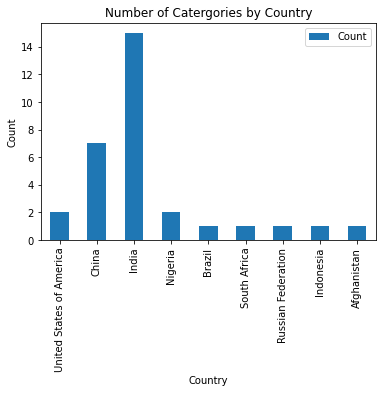

In [ ]:
from collections import Counter

countryDF = Counter(countryDeath.values())
countryCount = pd.DataFrame(pd.Series(countryDF, name = 'Count'))
countryCount.plot(kind='bar')
plt.title("Number of Catergories by Country")
plt.xlabel("Country")
plt.ylabel("Count");

More detailed version of the above graph that breaks down each cause of death by color.

In [ ]:
d1 = pd.DataFrame.from_dict(countryDeath, orient='index')
d2 = pd.DataFrame.from_dict(deathCount, orient='index')
d3 = pd.merge(d1,d2, left_index = True, right_index = True).reset_index()
d3 = d3.sort_values(by=['0_y'], ascending=False)

alt.Chart(d3).mark_bar(size = 50).properties(width = 500).encode(alt.X('0_x', axis=alt.Axis(title ='Country Name'), type='nominal', sort = None),
alt.Y('0_y', axis=alt.Axis(title ='Number of Deaths'), type='quantitative'), color=alt.Color('0_y', scale=alt.Scale(scheme='yelloworangered')),
tooltip =[alt.Tooltip('index', title ='Cause of Death'), alt.Tooltip('0_y', title= '# of Deaths')])

alt.Chart(...)

##What countries were most affected by Covid 19?

In [ ]:
import altair as alt
from altair import SortField
# from altair_saver import save

c19Death = df[['Country Name', 'Covid-19 Deaths']]
c19Death = c19Death.sort_values(by=['Covid-19 Deaths'], ascending=False)
alt.Chart(c19Death).mark_bar().encode(alt.Y('Covid-19 Deaths', type='quantitative'),
alt.X('Country Name', type='nominal', sort = None), color='Country Name', tooltip=['Covid-19 Deaths'])#.save('/content/drive/MyDrive/Manuel_CIS461/chart.html')
# chart.save('/content/drive/MyDrive/Manuel_CIS461/chart.png')

alt.Chart(...)

####The Mortality rate of Covid-19

I was able to calculate the mortality rate for twenty countries most effected by Covid-19. Peru had the highest with almost 3 deaths for every 1000 people.

In [ ]:
covidDF = df.nlargest(21, 'Covid-19 Deaths', keep = 'all')
covidDF = covidDF[['Country Name', 'Covid-19 Deaths']]
covidDF.reset_index(drop=True, inplace=True)

popDF = df2[['Country Name', 'Population']]
covidPopDF = covidDF.merge(popDF, how='left')
covidPopDF = covidPopDF.drop([6])
covidPopDF.reset_index(drop=True, inplace=True)
covidPopDF.at[9, 'Population']=83990000

covidPopDF['Mortality Rate'] = (covidPopDF['Covid-19 Deaths'] / covidPopDF['Population']) * 10**3

alt.Chart(covidPopDF, title ="Top 20 Covid-19 Mortality Rates").mark_line().encode(alt.X('Country Name',type= 'nominal'), alt.Y('Mortality Rate',type= 'quantitative'), tooltip=['Mortality Rate'])



alt.Chart(...)

##Are any of the causes of death correlated?

What surpised me the most was that there is a strong correlation between Tuberculosis deaths and deaths caused by Diarrheal diseases. Tuberculosis usually affects the lungs whereas Diarrheal diseases primarly affect the intensines.

Deaths from kidney diseases are closely related to most of the other causes of death such as cardiovascular diseases, respiratory diseases, drowning, and even digestive diseases. 

Lastly, another correlation I found interesting was deaths from maternal and neonatal diseases. While correlation does not neccessarilly imply causation its not surprising since that they are so closely correlated.

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-16-0890aefbf3d8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,Tuberculosis,Maternal disorders,Lower respiratory infections,Alcohol use disorders,Diarrheal diseases,Poisoning,Nutritional deficiencies,Alzheimer's disease,Parkinson's disease,Acute hepatitis,Digestive diseases,Cirrhosis and other chronic liver diseases,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes
Covid-19 Deaths,1.00,0.33,0.34,0.55,0.25,0.15,-0.01,0.64,0.12,0.27,0.24,0.43,0.56,0.28,0.09,0.35,0.46,0.47,0.27,0.50,0.47,0.32,0.35,0.39,0.26,0.77,0.34,0.34,0.43,-0.03,0.51
Cardiovascular diseases,0.33,1.00,0.93,0.89,0.46,0.36,0.06,0.42,0.25,0.53,0.42,0.73,0.77,0.46,0.90,0.63,0.90,0.97,0.55,0.86,0.83,0.54,0.97,0.79,0.95,0.37,0.95,0.72,0.87,-0.00,0.84
Respiratory diseases,0.34,0.93,1.00,0.94,0.65,0.48,0.10,0.45,0.26,0.76,0.62,0.85,0.70,0.70,0.75,0.69,0.80,0.91,0.77,0.93,0.91,0.54,0.86,0.90,0.98,0.33,0.97,0.75,0.96,0.00,0.91
Kidney diseases,0.55,0.89,0.94,1.00,0.65,0.49,0.12,0.59,0.28,0.72,0.62,0.87,0.73,0.66,0.68,0.75,0.84,0.92,0.73,0.95,0.94,0.62,0.85,0.87,0.91,0.48,0.93,0.70,0.93,0.01,0.96
Neonatal disorders,0.25,0.46,0.65,0.65,1.00,0.88,0.49,0.50,0.40,0.89,0.97,0.85,0.45,0.92,0.27,0.75,0.30,0.44,0.91,0.75,0.76,0.58,0.33,0.82,0.63,0.11,0.60,0.61,0.72,0.10,0.73
Meningitis,0.15,0.36,0.48,0.49,0.88,1.00,0.82,0.41,0.52,0.69,0.87,0.77,0.33,0.78,0.30,0.64,0.24,0.34,0.67,0.60,0.60,0.55,0.27,0.65,0.48,0.08,0.48,0.47,0.53,0.10,0.55
Malaria,-0.01,0.06,0.10,0.12,0.49,0.82,1.00,0.17,0.48,0.27,0.53,0.43,0.06,0.41,0.14,0.28,0.02,0.06,0.21,0.20,0.20,0.29,0.03,0.25,0.12,-0.00,0.14,0.14,0.13,0.11,0.14
Interpersonal violence,0.64,0.42,0.45,0.59,0.50,0.41,0.17,1.00,0.39,0.47,0.48,0.61,0.63,0.46,0.25,0.55,0.39,0.43,0.45,0.60,0.58,0.50,0.36,0.57,0.47,0.26,0.51,0.49,0.53,0.04,0.64
HIV/AIDS,0.12,0.25,0.26,0.28,0.40,0.52,0.48,0.39,1.00,0.34,0.41,0.43,0.24,0.35,0.27,0.36,0.19,0.23,0.27,0.32,0.31,0.36,0.21,0.39,0.29,0.07,0.32,0.29,0.30,0.02,0.32
Tuberculosis,0.27,0.53,0.76,0.72,0.89,0.69,0.27,0.47,0.34,1.00,0.92,0.87,0.51,0.97,0.24,0.73,0.35,0.50,0.98,0.84,0.85,0.55,0.37,0.90,0.73,0.12,0.69,0.72,0.83,0.03,0.82


##Is there a correlation between deaths caused by cardiovascular diseases and obesity?

Cardiovascular diseases are one of the leading causes of death among people. Obesity is also one of the main causes of cardiovascular diseases. The graph below displays the relationship of deaths caused by cardiovascular diseases. Unsurprisingly the obesity rate of the United States is the second highest but the deaths due to cardio vascular diseases is low in comparison to the two outliers: India and China.

This disparity can be accounted for mostly by the population size. However, the obesity rates are still much lower than that of the United States. Why is the population of India and China more succeptible to deaths from Cardiovascular diseases?

According to the Indian Heart Association India accounts for approximately 60% of the world's heart disease burden despite having less than 20% of the worlds population. The heart disease rate among indians is double that of the national average of the western world. This is suspected to be attributed to an underlying genetic predisposition to metabolic deregulation and cardiomyopathy. As well as an increased consumption of red meats/saturated fats and trans fats/junk foods and even stress.

As for China the risk of dying from cardiovascular diseases has been attributed to lifestyle changes, urbanization, the accelerated aging of the population. Other factors include high smoking rates, poor diet and nutrition, and air pollution.

In [ ]:
CVDF = df[['Country Name', 'Cardiovascular diseases']]
ODF = df2[['Country Name', 'Obesity']]

CVODF = CVDF.merge(ODF, how = 'right')

In [ ]:
select = alt.selection(type='interval')

values = alt.Chart(CVODF).mark_point().encode(alt.X('Cardiovascular diseases', axis=alt.Axis(title ='Deaths caused by Cardiovascular Diseases'), type='quantitative'), 
alt.Y('Obesity', type='quantitative'), color='Country Name', tooltip=['Country Name']).add_selection(select)

bars = alt.Chart(CVODF).mark_bar().encode(alt.X('Cardiovascular diseases', axis=alt.Axis(title ='Deaths caused by Cardiovascular Diseases'), type='quantitative'), 
alt.Y('Obesity', type='quantitative'), color='Country Name',tooltip=['Country Name', alt.Tooltip('Cardiovascular diseases', title = "Deaths")]).transform_filter(select)

values | bars

alt.HConcatChart(...)

## Conclusion
The data set contains 33 different causes of death. When analyzing causes of death one first questions that need to be asked is what other external factors could have led to the development of this disease. Through this analysis I wanted to see if what the people of each country ate had any correlation to the reported causes of death. Besides diet, other external factors can include environmental or genetics(as mentioned above). 
I wanted to see if there was any correlation between what we ate and the cause of deaths but the results were inconclusive. If I were to improve this analysis I would find a better dataset of food intake and also look for other environmental datasets.

Compared to China and India, people in the United States more than twice the amount of Alcoholic Beverages and Animal Products. But compared to China and India, people of the United States consume less than the reccommended 40% of vegatables. Also all three countries consume less than the reccomended 10% of fruits.

##Referenece

http://indianheartassociation.org/why-indians-why-south-asians/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7008101/#:~:text=Rapid%20socioeconomic%20progress%20has%20greatly,diseases%20(CVD)%20has%20increased.

https://www.healthyforlifemeals.com/blog/why-macronutrients-are-important#:~:text=and%20healthy%20fats.-,According%20to%20the%20National%20Academy%20of%20Sciences%2C%20current%20recommendations%20for,by%20visualizing%20a%20healthy%20plate.

https://www.medicinenet.com/myplate/article.htm

In [ ]:

!jupyter nbconvert --to html /content/Manuel_Final_CIS461.ipynb

[NbConvertApp] Converting notebook /content/Manuel_Final_CIS461.ipynb to html
[NbConvertApp] Writing 499761 bytes to /content/Manuel_Final_CIS461.html
